<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# EDA on IPL's Data

<img src="ipl.jpeg" width="640" height="360" align='left'><br/>

# Table of Contents
- 1. [Problem Statement](#section1)</br>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>
- 4. [Analysis based on single parameter](#section4)</br>
    - 4.1 [Number of Seasons and Matches](#section401)<br/>
    - 4.2 [Which Team had won by maximum wickets?](#section402)<br/>
    - 4.3 [Which Team had won by maximum runs?](#section403)<br/>
    - 4.4 [Which Team had won by (closest margin) minimum runs?](#section404)<br/>
    - 4.5 [Which Team had won by minimum wickets?](#section405)<br/>            
    - 4.6 [Which season had most number of matches?](#section406)<br/>
    - 4.7 [Toss wins per team](#section407)<br/>
    - 4.8 [Which is The Most Favorite Venue of Matches?](#section408)<br/>
    - 4.9 [Who is the player with maximum no of man of the match?](#section409)<br/>
   - 4.10 [Who is Most Popular Umpire?](#section410)<br/>
- 5. [Analysis based on multiple parameters](#section5)</br>
    - 5.1 [Top Wicketkeeper of IPL](#section501)<br/>
    - 5.2 [Top Bowler of IPL](#section502)<br/>
    - 5.3 [Top Batsman of IPL](#section503)<br/>
    - 5.4 [Highest and lowest runs in IPL History](#section504)<br/>
    - 5.5 [Average runs in all IPL seasons](#section505)<br/>
    - 5.6 [Toss Call for a given City](#section506)<br/>
    - 5.7 [Find season winner for each season (season winner is the winner of the last match of each season)](#section507)<br/>
    - 5.8 [Has Toss-winning helped in winning matches?](#section508)<br/>
    - 5.9 [Which IPL Team is most successful?](#section509)<br/>
    - 5.10 [Is it possible to chase >200 Target](#section510)<br/>
    - 5.11 [Toss Decision per season and venue](#section511)<br/>
    
- 6. [Conclusion](#section6)<br/>

<a id=section1></a> 
## 1. Problem Statement
The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing Indian cities and some states. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008.

#### What are the IPL trends of Winners, Teams, Toss Decisions and Average Runs Distribution in all IPL Seasons

#### How can analysis help in betting in Fantasy Leagues like Dream 11

#### Preditcing outcome of IPL match based on variables like Toss Winner, Venue, City

<a id=section2></a> 
### 2. Load the packages and data 

#### Run this line in case you dont have pandas_profiling installed.
```python
!pip install pandas_profiling
```                                                  

In [1]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs 
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

matches = pd.read_csv("matches.csv")                                            # Load in the matches dataset as matches
deliveries = pd.read_csv("deliveries.csv")                                      # Load in the deliveries dataset as deliveries



<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a> 

In [3]:
matches.dtypes                                                # Display the data type for each variable

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [3]:
deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

<a id=section302></a> 

In [5]:
matches.head()                                                           # Display the first five rows of the data set

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [221]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


<a id=section303><a/>

In [6]:
matches.describe(include = 'all')                                                  # Descriptive statistics for the numerical variables

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,696.000000,696.000000,689,696,696,696,696,696,696,696.000000,693,696.000000,696.000000,693,696,695,695,60
unique,NaN,NaN,32,498,14,14,14,2,3,NaN,14,NaN,NaN,214,35,55,58,18
top,NaN,NaN,Mumbai,2009-05-07,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,NaN,94,2,91,90,90,413,686,NaN,98,NaN,NaN,20,73,73,56,6
mean,974.103448,2012.965517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027299,NaN,13.472701,3.349138,NaN,NaN,NaN,NaN,NaN
std,2143.239623,3.069266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163070,NaN,23.607994,3.411398,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,174.750000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,348.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,522.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [9]:
deliveries.describe(include = 'all') 

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,164750.000000,164750.000000,164750,164750,164750.000000,164750.000000,164750,164750,164750,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,8157,8157,5918
unique,NaN,NaN,14,14,NaN,NaN,488,484,378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464,9,476
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,KD Karthik
freq,NaN,NaN,20673,20573,NaN,NaN,3879,3832,3182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,4861,145
mean,977.951757,1.482307,NaN,NaN,10.151879,3.616243,NaN,NaN,NaN,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129,NaN,NaN,NaN
std,2147.671843,0.501592,NaN,NaN,5.675666,1.807398,NaN,NaN,NaN,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,175.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,349.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,521.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


#### Observations

lot of missing values in umpire3. 
few missing values in city, winner, player_of_match

<a id=section304></a> 

In [7]:
matches.sample(10)                                                                  # Display a random 10 rows from the data set

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
265,266,2011,Delhi,2011-04-28,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,normal,0,Kolkata Knight Riders,17,0,MK Tiwary,Feroz Shah Kotla,PR Reiffel,RJ Tucker,NaN
567,568,2015,Hyderabad,2015-05-15,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,1,Royal Challengers Bangalore,0,6,V Kohli,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,HDPK Dharmasena,NaN
354,355,2012,Mumbai,2012-05-06,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,2,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani,NaN
444,445,2013,Ranchi,2013-05-15,Pune Warriors,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Pune Warriors,7,0,MK Pandey,JSCA International Stadium Complex,NJ Llong,K Srinath,NaN
610,611,2016,Bangalore,2016-05-07,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,V Kohli,M Chinnaswamy Stadium,CB Gaffaney,BNJ Oxenford,NaN
536,537,2015,Visakhapatnam,2015-04-22,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Sunrisers Hyderabad,16,0,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,RK Illingworth,VA Kulkarni,NaN
167,168,2009,Durban,2009-05-20,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,LR Shukla,Kingsmead,BG Jerling,SJA Taufel,NaN
250,251,2011,Kolkata,2011-04-17,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,L Balaji,Eden Gardens,Aleem Dar,RB Tiffin,NaN
314,315,2012,Pune,2012-04-08,Pune Warriors,Kings XI Punjab,Pune Warriors,bat,normal,0,Pune Warriors,22,0,MN Samuels,Subrata Roy Sahara Stadium,S Das,SJA Taufel,NaN
404,405,2013,Hyderabad,2013-04-19,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,bat,normal,0,Sunrisers Hyderabad,0,5,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",HDPK Dharmasena,CK Nandan,NaN


<a id=section305><a/>

In [2]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(matches)
profile.to_file(output_file="preprocessingfile-matches.html")                              # HTML file will be downloaded to your workspace

profile = pandas_profiling.ProfileReport(deliveries)
profile.to_file(output_file="preprocessingfile-deliveries.html") 

<a id=section306></a> 
### 3.6. Initial observations:

- Summary of data types in matches dataset:
 - <em>Numeric</em>: <strong>Win_By_Runs, Win_By_Wickets, Season</strong> (integer)
 - <em>Object</em>: Everything else
 - <strong>season</strong> has 11 distinct values meaning data covers for 11 IPL seasons from 2008-2018
 - <strong>city</strong>:  This should be not be null as match has to be played in the city. Also Bangalore and  Bengaluru are present as city names
 - <strong>umpire3</strong>: It has lot of missing values and can be dropped if not have value significance
 - <strong>date</strong>: All seasons except 2018 has date format YYYY-MM-DD, but in 2018 format is DD/MM/YY
 - <strong>winner,player_of_match</strong> winner has 3 nan values as those matches are draw. As a result player_of_match also have 3 nan values


### Making Same Date Format in Data Set converting in datetime

In [3]:
print(matches.shape)
df_season2018 = matches.query('season==2018')
df_season2018['date'] = df_season2018['date'].apply(lambda x: pd.Timestamp.strptime(x, '%d/%m/%y'))
index_list = matches.query('season==2018').index
matches.drop(index_list, inplace=True)
print(matches.season.unique())
matches['date'] = matches['date'].apply(lambda x: pd.Timestamp.strptime(x, '%Y-%m-%d'))
matches = pd.concat([matches, df_season2018])
matches.sort_values('date', ascending=True)
matches.shape

(696, 18)
[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016]


(696, 18)

### Correcting city name from Bengaluru to Bangalore

In [4]:
matches['city'] = matches['city'].replace('Bengaluru', 'Bangalore')

### Fill Dubai as city for NAN values as venue is Dubai International Cricket Stadium

In [5]:
matches['city'].fillna('Dubai', inplace=True)

In [6]:
matches.city.sort_values().unique()

array(['Abu Dhabi', 'Ahmedabad', 'Bangalore', 'Bloemfontein', 'Cape Town',
       'Centurion', 'Chandigarh', 'Chennai', 'Cuttack', 'Delhi',
       'Dharamsala', 'Dubai', 'Durban', 'East London', 'Hyderabad',
       'Indore', 'Jaipur', 'Johannesburg', 'Kanpur', 'Kimberley', 'Kochi',
       'Kolkata', 'Mohali', 'Mumbai', 'Nagpur', 'Port Elizabeth', 'Pune',
       'Raipur', 'Rajkot', 'Ranchi', 'Sharjah', 'Visakhapatnam'],
      dtype=object)

### Fill na for umpire1 and umpire2 with mode values

In [7]:
matches['umpire1'].fillna(matches['umpire1'].mode()[0], inplace=True)

In [8]:
matches['umpire2'].fillna(matches['umpire2'].mode()[0], inplace=True)

### Fill na for winner and player of the match

In [9]:
matches['winner'].fillna('Draw', inplace=True)

In [10]:
matches['player_of_match'].fillna('Draw', inplace=True)

### remove umpire3 column as having lot of missing values and not relevant for our analysis

In [11]:
matches.drop('umpire3', axis=1,inplace=True)

In [12]:
matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

<a id=section307></a> 
### 3.7. Final observations 




In [13]:
profile = pandas_profiling.ProfileReport(matches)
profile.to_file(output_file="postprocessingfile-matches.html")    

profile = pandas_profiling.ProfileReport(deliveries)
profile.to_file(output_file="postprocessingfile-deliveries.html") 

- Summary of data types in matches dataset:
 - <em>Numeric</em>: <strong>Win_By_Runs, Win_By_Wickets, Season</strong> (integer)
 - <em>Object</em>: Everything else
 - <strong>season</strong> has 11 distinct values meaning data covers for 11 IPL seasons from 2008-2018
 - <strong>city</strong>:  There is no null value and Dubai is used to fill for matches played in Dubai Stadium.
 - <strong>umpire3</strong>: this column is dropped due to lot of missing values
 - <strong>date</strong>: date is now converted in YYYY-MM-DD format
 - <strong>winner,player_of_match</strong> There is no null value and filled with 'Draw' value

<a id=section4></a> 
### 4. Analysis based on single parameter

<a id=section401><a/>

### 4.1. Number of Seasons and Matches

In [194]:
seasons = matches.season.unique()
seasons.sort()
print(len(seasons))
print(seasons)
print(matches.id.count())

11
[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
696


Data set has 11 seasons from 2008-2018 and total 696 matches

<a id=section402></a> 
### 4.2. Which Team had won by maximum wickets?

In [199]:
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

Kolkata Knight Riders has won by 10 wickets maxiumum margin

<a id=section403></a>
### 4.3. Which Team had won by maximum runs?

In [200]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

Mumbai Indians has won by 146 runs margin

<a id=section404></a> 
### 4.4. Which Team had won by (closest margin) minimum runs?


In [189]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

Mumbai Indians has won by minumum 1 run margin

<a id=section405></a>
### 4.5. Which Team had won by minimum wickets?


In [201]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_runs.idxmin()]

id                                                       2
season                                                2017
city                                                  Pune
date                                            2017-04-06
team1                                       Mumbai Indians
team2                               Rising Pune Supergiant
toss_winner                         Rising Pune Supergiant
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                              Rising Pune Supergiant
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

<a id=section406></a> 
### 4.6. Which season had most number of matches?

In [205]:
matches.season.value_counts().head(3)

2013    76
2012    74
2011    73
Name: season, dtype: int64

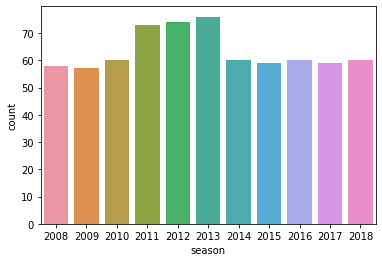

In [202]:
sns.countplot(x='season', data=matches)
plt.show()

### Observation

Year 2013 has most number of matches 

<a id=section407></a> 
### 4.7. Toss wins per team

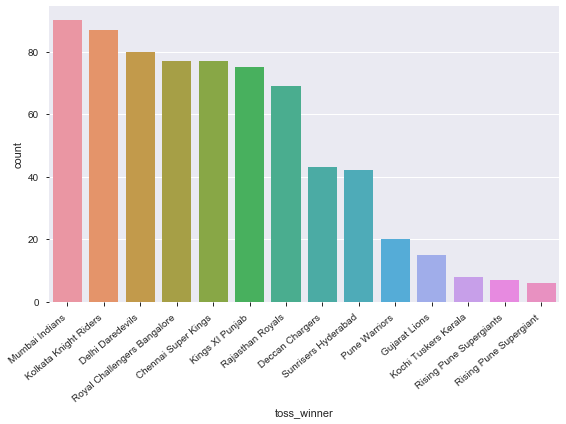

In [465]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='toss_winner', data=matches, order=pd.value_counts(matches['toss_winner']).index) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<a id=section408></a>
### 4.8. Which is The Most Favorite Venue of Matches?

In [460]:
df_top_venues = matches.venue.value_counts()[:5]
df_top_venues

M Chinnaswamy Stadium                        73
Eden Gardens                                 70
Feroz Shah Kotla                             67
Wankhede Stadium                             66
Rajiv Gandhi International Stadium, Uppal    56
Name: venue, dtype: int64

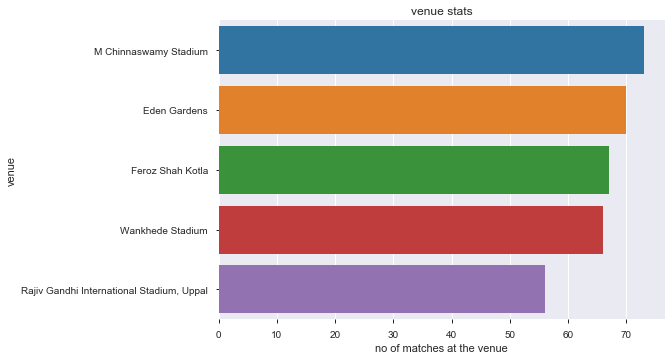

In [461]:
sns.barplot(x = df_top_venues, y = df_top_venues.index, orient='h');
plt.xlabel('no of matches at the venue')
plt.ylabel('venue')
plt.title('venue stats')
plt.show()

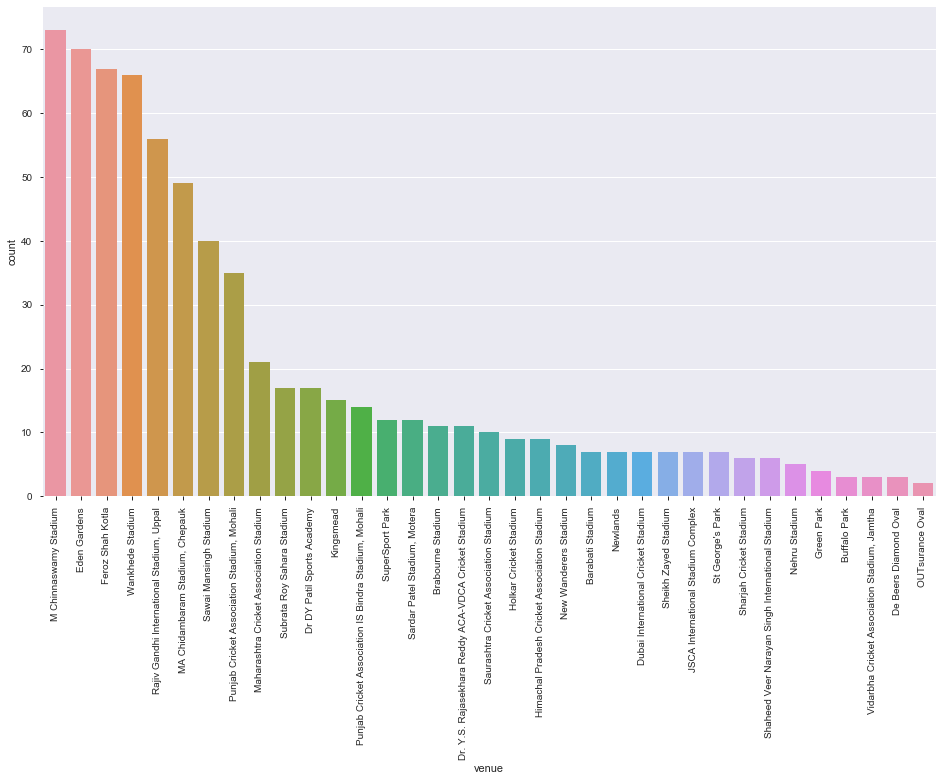

In [462]:
plt.figure(figsize=(16,9))
sns.countplot(x='venue', data=matches, order=pd.value_counts(matches['venue']).index) 
plt.xticks(rotation='vertical')
plt.show()

### Observation


<a id=section409></a>
### 4.9 Who is the player with maximum no of man of the match?

In [141]:
top_players = matches.player_of_match.value_counts()[:10]

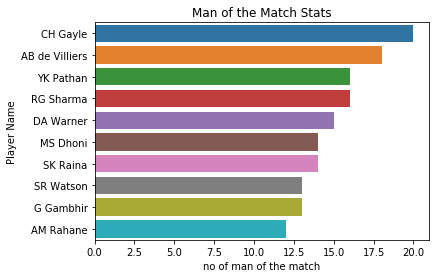

In [258]:
sns.barplot(x = top_players, y = top_players.index, orient='h');
plt.xlabel('no of man of the match')
plt.ylabel('Player Name')
plt.title('Man of the Match Stats')
plt.show()

### Observation

Clearly Chris Gayle is the player with maximum no of man of match awards

<a id=section410></a>
### 4.10 Who is Most Popular Umpire?

In [601]:
df_umpire = pd.concat([matches['umpire1'], matches['umpire2']])

In [605]:
df_umpire = df_umpire.sort_values().value_counts().reset_index()

In [607]:
df_umpire.columns = ['umpire name', 'count']

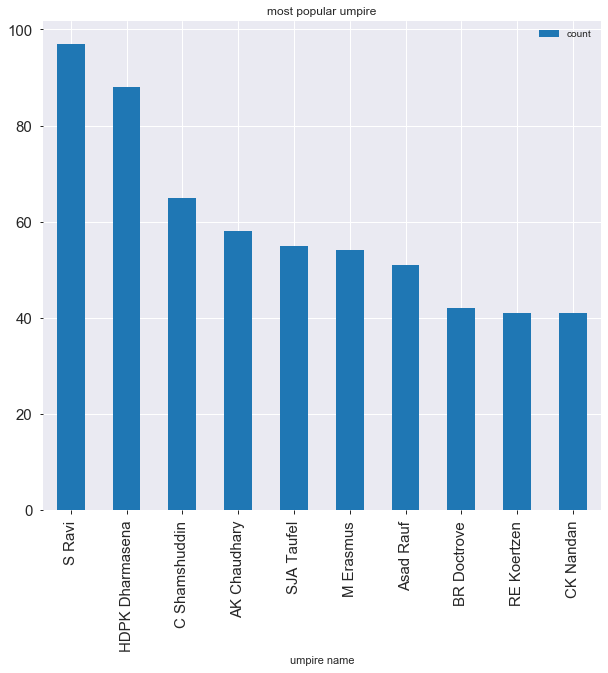

In [622]:
df_umpire.head(10).plot(kind='bar', x='umpire name', figsize=(10,9), fontsize=15, title='most popular umpire')

<a id=section5></a>
### 5. Analysis based on multiple parameters

<a id=section501></a>
### 5.1. Top Wicketkeeper of IPL

In [34]:
wicket_keeper_stumpings = deliveries.query('dismissal_kind==\'stumped\'')['fielder'].value_counts().reset_index()
wicket_keeper_stumpings.columns = ['wicket-keeper', 'stumpings']
wicket_keeper_stumpings.head(3)

,wicket-keeper,stumpings
0,MS Dhoni,33
1,RV Uthappa,32
2,KD Karthik,29


In [35]:
wicket_keepers = deliveries.query('dismissal_kind==\'stumped\'')['fielder'].unique()
wicket_keeper_catches = deliveries[(deliveries['dismissal_kind']=='caught') & (deliveries['fielder'].isin(wicket_keepers))]['fielder'].value_counts().reset_index()
wicket_keeper_catches.columns = ['wicket-keeper', 'catches']
wicket_keeper_catches.head(3)


,wicket-keeper,catches
0,KD Karthik,102
1,AB de Villiers,87
2,MS Dhoni,87


In [55]:
df_wicket_keepers = pd.merge(left=wicket_keeper_stumpings, right=wicket_keeper_catches, on='wicket-keeper')
df_wicket_keepers['total']=df_wicket_keepers['stumpings'] + df_wicket_keepers['catches']
df_wicket_keepers.sort_values('total', ascending=False, inplace=True)
df_wicket_keepers.head(3)

,wicket-keeper,stumpings,catches,total
2,KD Karthik,29,102,131
0,MS Dhoni,33,87,120
1,RV Uthappa,32,80,112


Text(0.5, 1.0, 'Wicket Keeper Stats')

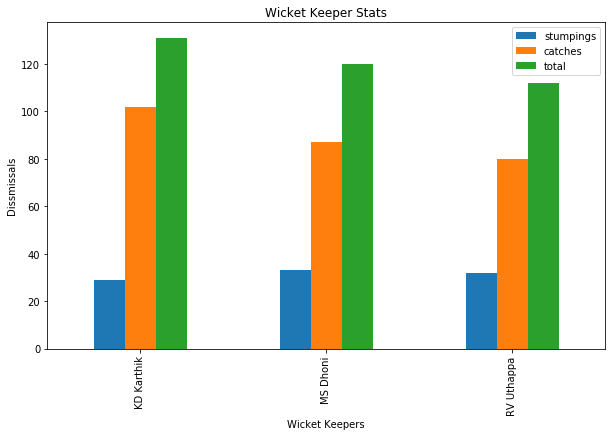

In [83]:
df_wicket_keepers_top3 = df_wicket_keepers.head(3)
df_wicket_keepers_top3.plot(kind='bar', figsize=(10,6), x='wicket-keeper')

plt.xlabel('Wicket Keepers')
plt.ylabel('Dissmissals')
plt.title('Wicket Keeper Stats')


#### Observation



Overall KD Karthik is best wicket keeper in IPL. when it comes to stumpings, MS Dhoni performs the best followed by RV Uthappa and KD Karthik.

<a id=section502><a/>

<a id=section502></a>
### 5.2. Top Bowler of IPL

In [133]:
deliveries.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [138]:
bowler = deliveries[deliveries.dismissal_kind.isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket'])]['bowler'].value_counts().reset_index()
bowler.columns = ['bowler name', 'no of wickets']
bowler.sort_values('no of wickets', ascending=False, inplace=True)
bowler_top3 = bowler.head(3)
bowler_top3

,bowler name,no of wickets
0,SL Malinga,154
1,A Mishra,146
2,PP Chawla,139


Text(0.5, 1.0, 'Bolwer Stats')

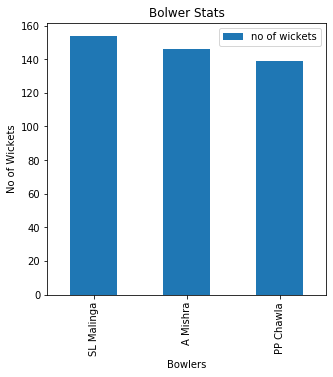

In [139]:
bowler_top3.plot(kind='bar', figsize=(5,5), x='bowler name')

plt.xlabel('Bowlers')
plt.ylabel('No of Wickets')
plt.title('Bolwer Stats')

### Observation




As seen from the above chart, Latish Malinga has taken the most number of wickets and is the top bowler of the IPL

<a id=section503><a/>

<a id=section503></a>
### 5.3. Top Batsman of the IPL

In [154]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [165]:
batsman = deliveries.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).reset_index()
batsman.columns = ['batsman-name', 'total runs scored']
batsman_top3 = batsman.head(3)

Text(0.5, 1.0, 'Batsman Stats')

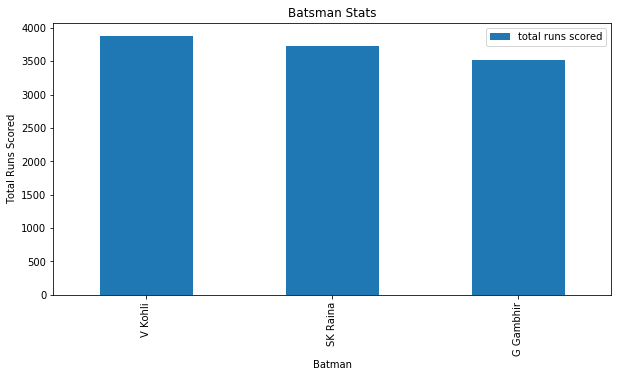

In [169]:
batsman_top3
batsman_top3.plot(kind='bar', figsize=(10,5), x='batsman-name')

plt.xlabel('Batman')
plt.ylabel('Total Runs Scored')
plt.title('Batsman Stats')

### Observation



<a id=section504></a>
### 5.4. Highest and lowest runs in IPL History

In [546]:
normal_matches = matches.query('result==\'normal\' & dl_applied==0')
df_merge = pd.merge(left=normal_matches, right=deliveries, left_on='id', right_on='match_id')[['id', 'season', 'inning', 'batting_team', 'bowling_team', 'total_runs']]

highest = df_merge.groupby(['id', 'season', 'inning', 'batting_team', 'bowling_team'])['total_runs'].sum().sort_values(ascending=False).reset_index()
highest.drop(['id', 'inning'], axis=1, inplace=True)
highest.columns = ['season', 'high_scoring_team', 'against', 'total runs']
highest.head(5)


,season,high_scoring_team,against,total runs
0,2013,Royal Challengers Bangalore,Pune Warriors,263
1,2018,Kolkata Knight Riders,Kings XI Punjab,250
2,2016,Royal Challengers Bangalore,Gujarat Lions,248
3,2010,Chennai Super Kings,Rajasthan Royals,246
4,2008,Chennai Super Kings,Kings XI Punjab,240


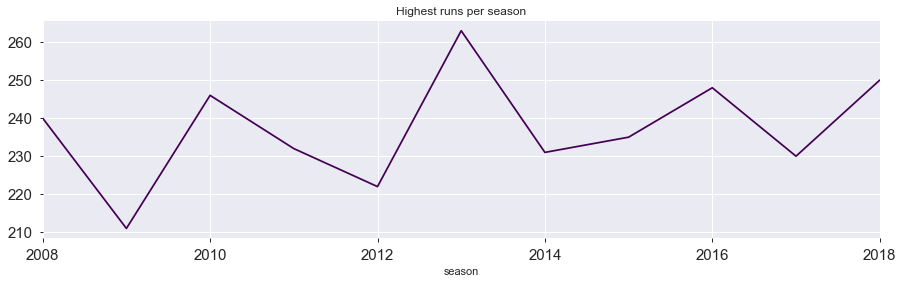

In [628]:
highest_per_season = highest.groupby('season')['total runs'].max()
highest_per_season.plot(kind='line', x='season', y='total runs', figsize=(15,4), title='Highest runs per season', fontsize=15, colormap='viridis')



In [548]:
lowest = df_merge.groupby(['id', 'season', 'inning', 'batting_team', 'bowling_team'])['total_runs'].sum().sort_values().reset_index()
lowest.drop(['id', 'inning'], axis=1, inplace=True)
lowest.columns = ['season', 'low_scoring_team', 'against', 'total runs']
lowest.head(5)



,season,low_scoring_team,against,total runs
0,2017,Royal Challengers Bangalore,Kolkata Knight Riders,49
1,2009,Rajasthan Royals,Royal Challengers Bangalore,58
2,2017,Delhi Daredevils,Mumbai Indians,66
3,2017,Delhi Daredevils,Kings XI Punjab,67
4,2008,Kolkata Knight Riders,Mumbai Indians,67


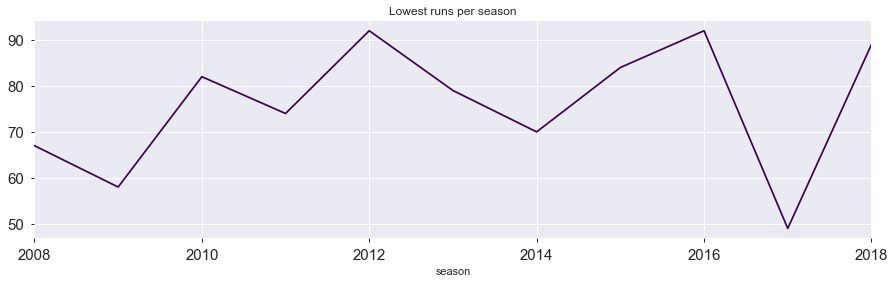

In [631]:
lowest_per_season = lowest.groupby('season')['total runs'].min()
lowest_per_season.plot(kind='line', x='season', y='total runs', figsize=(15,4), title='Lowest runs per season', fontsize=15, colormap='viridis')



### Observation



Royal Challengers Bangalore has both highest and lowest score in IPL history.

<a id=section506><a/>

<a id=section505></a>
### 5.5. Average runs in all IPL seasons

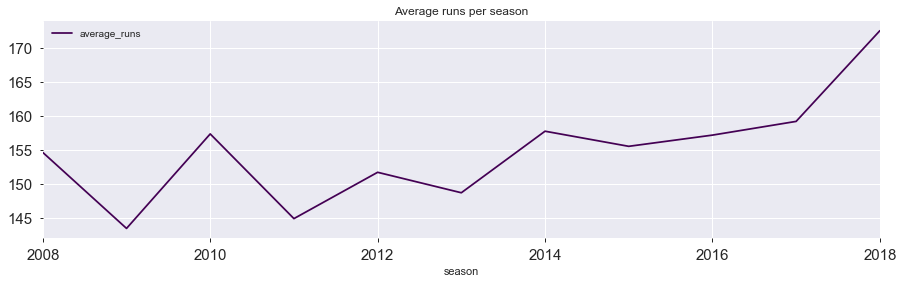

In [632]:
df_match_del = pd.merge(left=matches, right=deliveries, left_on=['id'], right_on=['match_id'])

df_total = df_match_del.groupby(['id', 'season', 'inning'])['total_runs'].sum().reset_index()
df_total = (df_total.groupby(['id', 'season'])['total_runs'].sum()/2).reset_index()
df_total = df_total.groupby(['season']).agg({'id':'count', 'total_runs':'sum'}).reset_index()
df_total['average_runs'] = df_total['total_runs']/df_total['id']
df_total.drop(['id', 'total_runs'], axis=1, inplace=True)
df_total.plot(kind='line', x='season', y='average_runs', figsize=(15,4), title='Average runs per season', fontsize=15, colormap='viridis')




### Observation


From the above time-series graph, we can say that in season 2009, the average score was very less and in season 2018, the average score was highest.


<a id=section507><a/>

<a id=section506></a>
### 5.6. Toss Call for a given City

In [425]:
df_toss = matches[['city','toss_decision','toss_winner','winner']]

In [426]:
df_toss = df_toss[pd.notnull(df_toss['winner'])]
df_toss.winner.isna().sum()

0

In [428]:
df_toss[df_toss['city'].isna()]

,city,toss_decision,toss_winner,winner


In [429]:
def decision(row):
    if row['toss_winner'] == row['winner']:
        val = row['toss_decision']
    else:
        if row['toss_decision'] == 'bat':
            val = 'field'
        else:
            val = 'bat'
    return val
# Apply the above function to the toss DataFrame
df_toss['decision'] = df_toss.apply(decision, axis=1)
# Get first 5 rows
df_toss.head()

,city,toss_decision,toss_winner,winner,decision
0,Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,bat
1,Pune,field,Rising Pune Supergiant,Rising Pune Supergiant,field
2,Rajkot,field,Kolkata Knight Riders,Kolkata Knight Riders,field
3,Indore,field,Kings XI Punjab,Kings XI Punjab,field
4,Bangalore,bat,Royal Challengers Bangalore,Royal Challengers Bangalore,bat


In [430]:
df_toss = df_toss[['city','decision']]
df_toss.head()

,city,decision
0,Hyderabad,bat
1,Pune,field
2,Rajkot,field
3,Indore,field
4,Bangalore,bat


In [431]:
df_decision = pd.get_dummies(df_toss.decision)
df_decision.head()

,bat,field
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [433]:
df_toss = pd.concat([df_toss,df_decision], axis=1)
df_toss.drop(['decision'], axis=1, inplace=True)
df_toss.head()

,city,bat,field
0,Hyderabad,1,0
1,Pune,0,1
2,Rajkot,0,1
3,Indore,0,1
4,Bangalore,1,0


In [ ]:
df_toss = df_toss.groupby('city').sum().reset_index()

In [434]:
# Group by city and then get sum of all the other columns
df_toss = df_toss.groupby('city').sum().reset_index()
# Get the total matches played
df_toss['total'] = df_toss.bat+df_toss.field
# Calculate batting decision percentage
df_toss['bat_decision'] = round(((df_toss.bat)/df_toss.total)*100,2)
# Calculate feilding decision percentage
df_toss['field_decision'] = round(((df_toss.field)/df_toss.total)*100,2)
# Get first 5 rows
df_toss.head()

,city,bat,field,total,bat_decision,field_decision
0,Abu Dhabi,4,3,7,57.14,42.86
1,Ahmedabad,6,6,12,50.00,50.00
2,Bangalore,30,41,71,42.25,57.75
3,Bloemfontein,1,1,2,50.00,50.00
4,Cape Town,5,2,7,71.43,28.57


In [ ]:
df_toss.drop(['bat','field','total'], axis=1, inplace=True)


In [440]:
df_toss.head()

,city,bat_decision,field_decision
0,Abu Dhabi,57.14,42.86
1,Ahmedabad,50.00,50.00
2,Bangalore,42.25,57.75
3,Bloemfontein,50.00,50.00
4,Cape Town,71.43,28.57


Text(0.5, 1.0, 'Toss Dicision of a city')

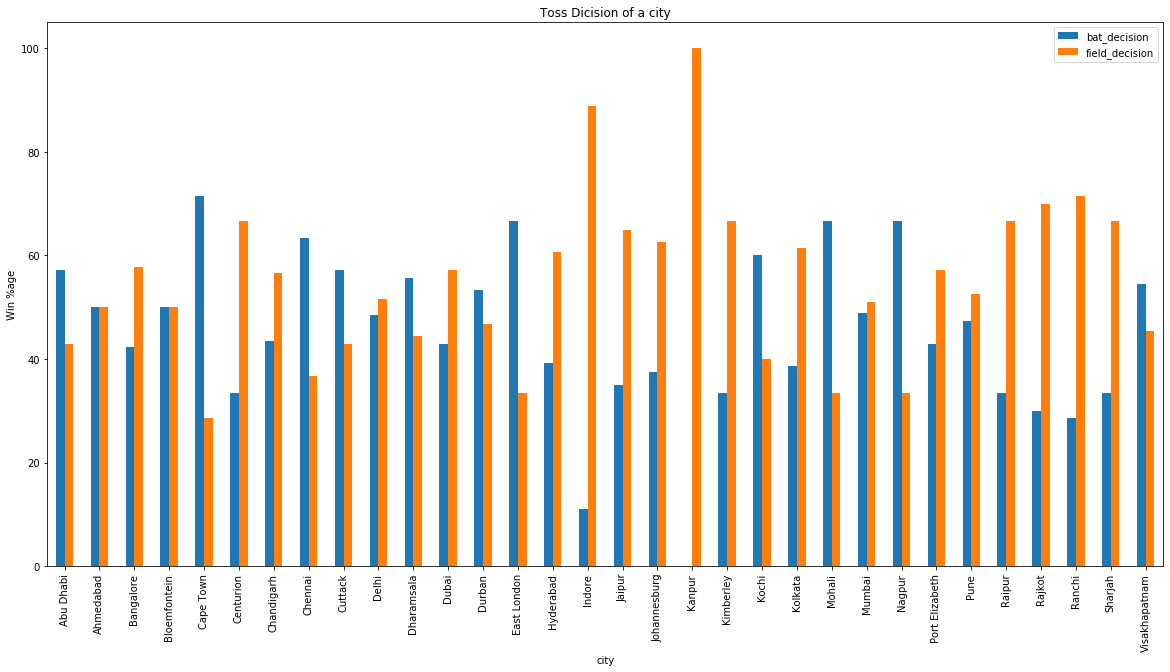

In [448]:
df_toss.plot(kind='bar', figsize=(20,10), x='city')

plt.xlabel('city')
plt.ylabel('Win %age')
plt.title('Toss Dicision of a city')

<a id=section508><a/>

## Observation

<a id=section507></a>
### 5.7. Find season winner for each season (season winner is the winner of the last match of each season)

In [37]:
df_season_winner = matches.sort_values('date')[['season', 'date', 'winner']].reset_index()
df_season_winner.drop('index', axis=1, inplace=True)
df_season_winner = df_season_winner.drop_duplicates('season', keep='last')
df_season_winner.drop('date', axis=1, inplace=True)

In [38]:
df_season_winner

,season,winner
57,2008,Rajasthan Royals
114,2009,Deccan Chargers
174,2010,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad
635,2017,Mumbai Indians


In [39]:
data = df_season_winner.winner.value_counts()

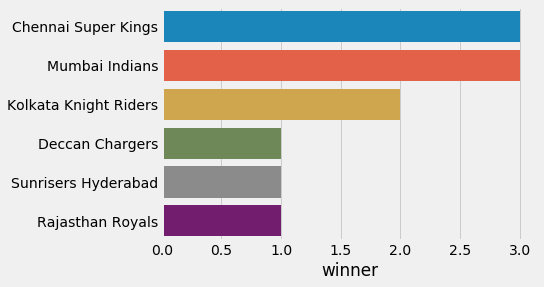

In [40]:
sns.barplot(y = data.index, x = data, orient='h');

Text(0.5, 1.0, 'Donut Plot showing the proportion of each winner value')

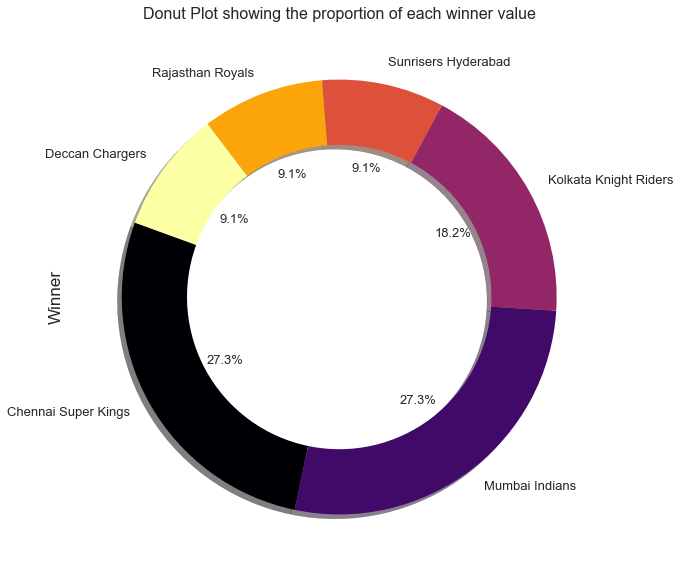

In [679]:
plt.figure(figsize=(15,15))

space = [0.1,0.1,0.1,0.1,0.1,0.1]
df_season_winner['winner'].value_counts().plot(kind='pie',  fontsize=13, autopct='%3.1f%%', wedgeprops=dict(width=0.3), 
                                       shadow=True, startangle=160, legend=False, figsize=(10,10), cmap='inferno')

plt.ylabel('Winner', fontsize=17)
plt.title('No of seasons won by each team', fontsize=16)

<a id=section509><a/>

<a id=section601><a/>

<a id=section508></a>
### 5.8.  Has Toss-winning helped in winning matches?

<a id=section602><a/>

In [59]:
ss = matches['toss_winner'] == matches['winner']
(matches[ss]['id'].count())/(matches['id'].count())*100

51.293103448275865

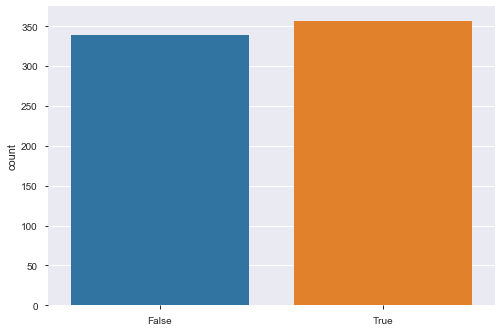

In [760]:
sns.countplot~(ss);

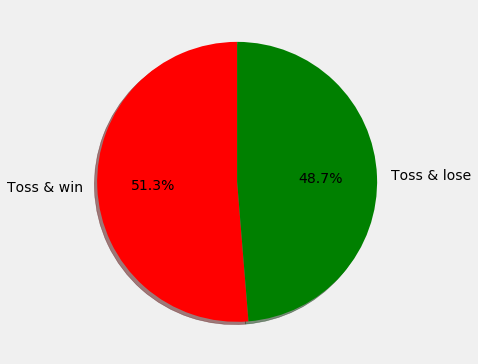

In [54]:
plt.style.use('fivethirtyeight')
df_fil=matches[matches['toss_winner']==matches['winner']]
slices=[len(df_fil),(len(matches)-len(df_fil))]
plt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Mumbai Indians                 90
Kolkata Knight Riders          87
Delhi Daredevils               80
Royal Challengers Bangalore    77
Chennai Super Kings            77
Name: toss_winner, dtype: int64


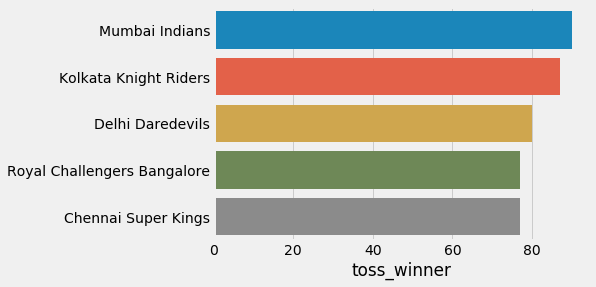

In [35]:
data = matches.toss_winner.value_counts().head(5)
print(data)
sns.barplot(y = data.index, x = data, orient='h');

#### Observation



<a id=section603><a/>

<a id=section509></a>
### 5.9. Which IPL Team is most successful?



In [207]:
matches.winner.value_counts().head(4)

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Name: winner, dtype: int64

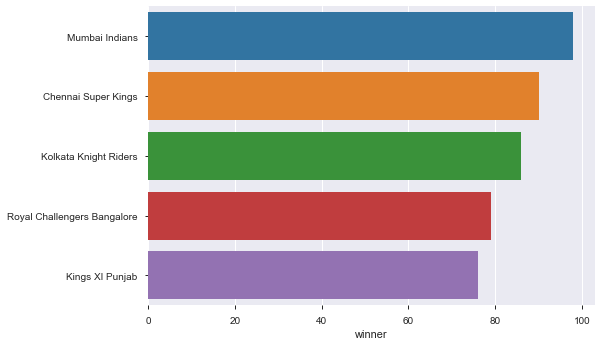

In [759]:
data = matches.winner.value_counts().head(5)
sns.barplot(y = data.index, x = data, orient='h');

In [217]:
matches_played=pd.concat([matches['team1'],matches['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played.set_index('Team',inplace=True)
matches_played.head()

,Total Matches,wins
Team,,
Mumbai Indians,171,98
Royal Challengers Bangalore,166,90
Kolkata Knight Riders,164,86
Kings XI Punjab,162,79
Delhi Daredevils,161,76


In [220]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage.head(3)


Team
Mumbai Indians                 57.3
Royal Challengers Bangalore    54.2
Kolkata Knight Riders          52.4
dtype: float64

Mumbai Indians has the most number of wins with the most number of matches.</br>
MI and KXIP have the highest and lowest win percentage respectively.</br>
MI is the most successful team with approximately 58.3 win percentage.

<a id=section510></a> 
### 5.10. Is it possible to chase >200 Target



In [53]:
df_totalgt200 = deliveries.groupby(['match_id','inning'])['total_runs'].sum().reset_index()
df_total_inning1_gt200 = df_totalgt200.query('inning==1 & total_runs>=200')
df_total_inning2_gt200 = df_totalgt200.query('inning==2')

df_total_inning1_gt200.count()

match_id      65
inning        65
total_runs    65
dtype: int64

    match_id  inning1  inning1_total  inning2  inning2_total  is_chased
5         41        1            208        2            214       True
11        68        1            214        2            217       True
17       181        1            203        2            204       True
20       208        1            200        2            204       True
25       320        1            205        2            208       True
33       460        1            205        2            206       True
35       496        1            205        2            211       True
49      7898        1            207        2            212       True
57      7917        1            213        2            218       True


Text(0.5, 1.0, '200 scored chased?')

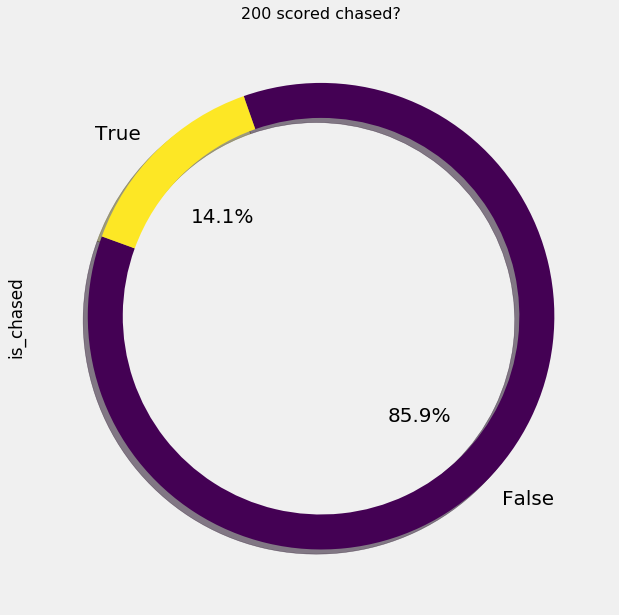

In [52]:
df_chase = pd.merge(left=df_total_inning1_gt200, right=df_total_inning2_gt200, on='match_id').reset_index()

df_chase.drop(['index'], axis=1, inplace=True)

df_chase.columns = ['match_id', 'inning1', 'inning1_total', 'inning2', 'inning2_total']
df_chase['is_chased'] = df_chase.inning2_total > df_chase.inning1_total
print(df_chase[df_chase['is_chased']])
plt.figure(figsize=(15,15))
df_chase['is_chased'].value_counts().plot(kind='pie',  fontsize=20, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, legend=False, figsize=(10,10), cmap='viridis')

plt.title('200 scored chased?', fontsize=16)

<a id=section511></a> 
### 5.11. Toss Decision per season and venue

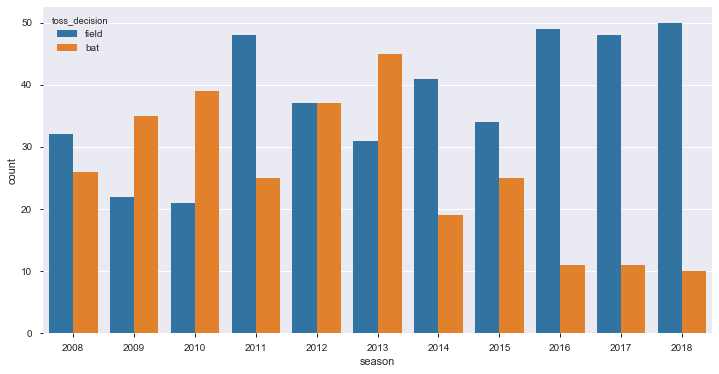

In [753]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches)

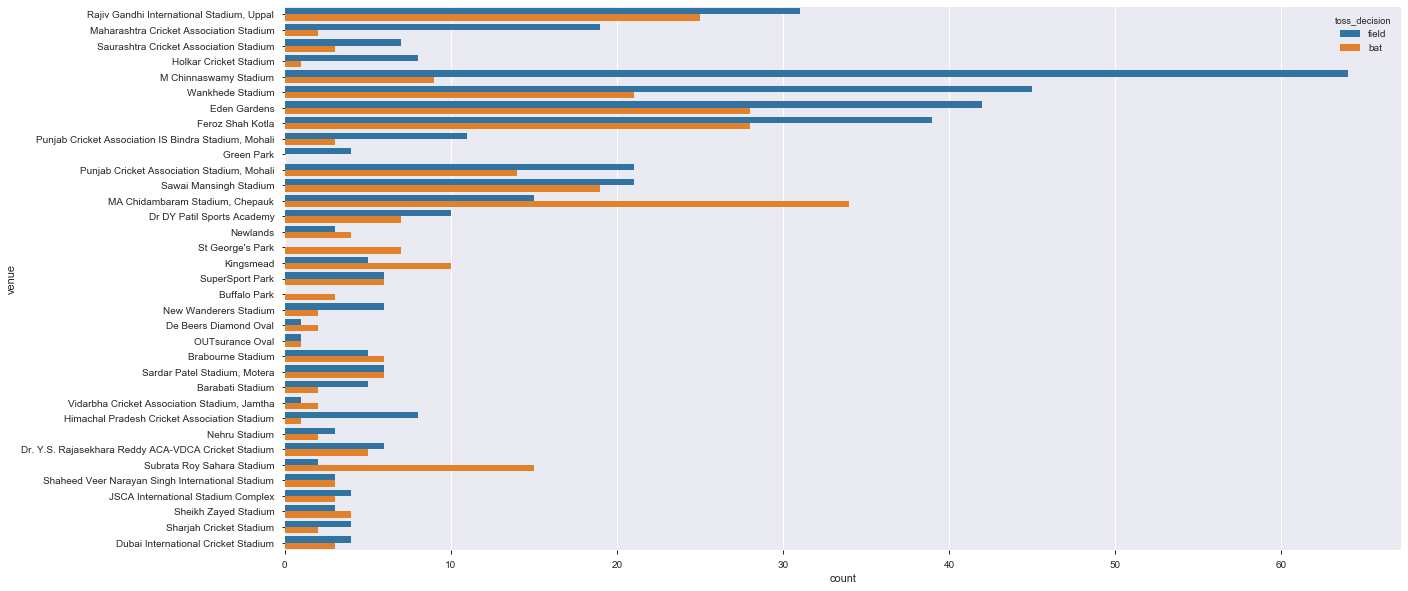

In [756]:
plt.figure(figsize=(20,10))
sns.countplot(y='venue', hue='toss_decision', data=matches)

<a id=section6></a> 

# Conclusion



#### Mumbai Indians and Chennai Super Kings has each won 3 seasons in IPL so far.
#### Mumbai Indians has won maximum 98 matches in IPL and is most successful team.
#### Mumbai Indians has won 90 tosses in IPL so far.
#### Toss winning does not contribute much in the chances of winning the match even though Indian Players/Captains are well versed with Indian Venue and Pitch conditions
#### Virat Kohli is the top batsman in terms of total runs scored
#### S Malinga is the top bowler in terms of total wickets taken
#### Overall KD Karthik is best wicket keeper in IPL. But when it comes to stumpings, MS Dhoni performs the best followed by RV Uthappa and KD Karthik.
#### Average runs scored is maximum in season 2018
#### Total 9 matches out of 65 matches have been chased where 1st innings total is more than 200 which shows how difficult to chase target of more than 200

